In [3]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

In [4]:
supply_data = pd.read_csv('C:/Users/Patron/Desktop/study/fin 850/SupplyData.csv')

# Handle missing values
supply_data['Supply'] = supply_data['Supply'].str.replace(',', '').astype(float)
supply_data.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Convert 'Date' to datetime format
supply_data['Date'] = pd.to_datetime(supply_data['Date'], format='%m/%d/%Y')


C:\Users\Patron\AppData\Local\Temp\ipykernel_14440\3303645124.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  supply_data.fillna(method='ffill', inplace=True)  # Forward fill missing values


In [6]:


# Extract day of the year for seasonality
supply_data['Day_of_Year'] = supply_data['Date'].dt.dayofyear

# Add sin and cos for seasonality features
supply_data['Sin_Seasonality'] = np.sin(2 * np.pi * supply_data['Day_of_Year'] / 365.0)
supply_data['Cos_Seasonality'] = np.cos(2 * np.pi * supply_data['Day_of_Year'] / 365.0)

# Define Features and Target
X = supply_data[['72 Day Temperature', '72 Day Precipitation', 'Sin_Seasonality', 'Cos_Seasonality']]
y = supply_data['Supply']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Create a pipeline for polynomial regression with Ridge
ridge_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=1.0))
])

# Train the model
ridge_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = ridge_pipeline.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

rmse

np.float64(4391114.140211335)

In [7]:
from sklearn.metrics import r2_score

# Calculate R-squared value
r2 = r2_score(y_test, y_pred)

r2


0.14583114763893645

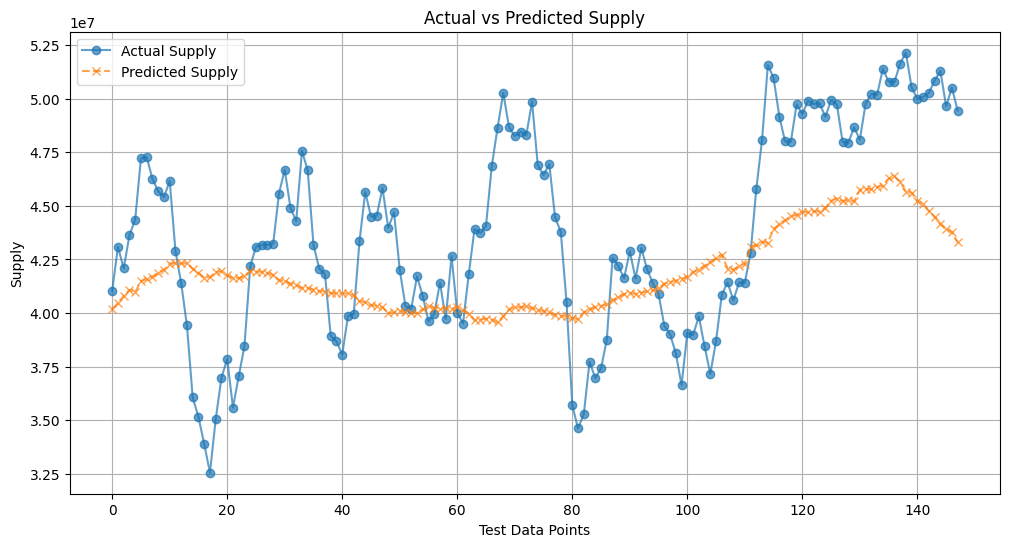

In [8]:
import matplotlib.pyplot as plt

# Create a plot to compare actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual Supply", linestyle='-', marker='o', alpha=0.7)
plt.plot(y_pred, label="Predicted Supply", linestyle='--', marker='x', alpha=0.7)
plt.title("Actual vs Predicted Supply")
plt.xlabel("Test Data Points")
plt.ylabel("Supply")
plt.legend()
plt.grid(True)
plt.show()
